### PyCaret

In [2]:
import numpy as np
import tensorflow as tf
# ^^^ pyforest auto-imports - don't write above this line
import yfinance as yf
from sklearn.model_selection import train_test_split
from pycaret.classification import * 

/home/jbohn/miniconda3/envs/research/lib/python3.6/site-packages/pycaret/loggers/mlflow_logger.py:14: FutureWarning: MLflow support for Python 3.6 is deprecated and will be dropped in an upcoming release. At that point, existing Python 3.6 workflows that use MLflow will continue to work without modification, but Python 3.6 users will no longer get access to the latest MLflow features and bugfixes. We recommend that you upgrade to Python 3.7 or newer.
  import mlflow


### Based on Price predict direction of volume next bar

In [3]:
aapl = yf.Ticker('TSLA')
history = aapl.history(period='7d', interval='1m')

history=history.drop(columns=['Dividends','Stock Splits'])
history['Next_VOL']=history['Volume'].shift(-1)
history['Next_VOL']=(history['Next_VOL']>history['Volume']).astype(int)
hisory=history.dropna()
history

,Open,High,Low,Close,Volume,Next_VOL
Datetime,,,,,,
2022-06-01 09:30:00-04:00,760.518005,762.099976,755.159973,760.518005,860394,0
2022-06-01 09:31:00-04:00,760.260010,765.630005,758.760010,764.027527,219095,0
2022-06-01 09:32:00-04:00,764.489990,767.000000,762.299988,764.692871,173199,1
2022-06-01 09:33:00-04:00,765.020020,769.259888,764.619995,765.500000,220991,0
2022-06-01 09:34:00-04:00,765.500000,767.313477,762.668823,764.170471,141513,0
...,...,...,...,...,...,...
2022-06-09 11:22:00-04:00,748.989990,750.359985,748.989990,749.740112,66153,0
2022-06-09 11:23:00-04:00,749.525024,750.169617,748.510010,749.184998,55986,0
2022-06-09 11:24:00-04:00,749.569885,750.570007,749.250000,750.130005,55799,1


In [9]:
### sklearn method to randomly sample train/test data -> Assuming no time series effect 
features=['Open','High','Low','Close','Volume']
X_train, X_test, Y_train, Y_test = train_test_split(history[features], history['Next_VOL'],  train_size = .75)
X_train

,Open,High,Low,Close,Volume
Datetime,,,,,
2022-06-06 10:29:00-04:00,722.000000,723.299988,721.903015,722.094421,70384
2022-06-02 12:49:00-04:00,784.299988,784.700012,783.857605,784.490112,29391
2022-06-08 12:12:00-04:00,734.390015,734.729980,733.820007,733.969971,28469
2022-06-07 09:30:00-04:00,702.000000,703.489990,700.400024,701.010010,1138654
2022-06-03 11:53:00-04:00,708.289978,708.519409,707.599976,707.864990,45848
...,...,...,...,...,...
2022-06-01 14:18:00-04:00,740.729980,740.729980,739.250000,739.760010,41573
2022-06-02 15:57:00-04:00,778.505005,779.349976,778.000000,778.412476,146429
2022-06-03 15:26:00-04:00,703.079895,703.769287,702.299988,703.609985,52437


In [10]:
Y_train

Datetime
2022-06-06 10:29:00-04:00    1
2022-06-02 12:49:00-04:00    1
2022-06-08 12:12:00-04:00    1
2022-06-07 09:30:00-04:00    0
2022-06-03 11:53:00-04:00    0
                            ..
2022-06-01 14:18:00-04:00    1
2022-06-02 15:57:00-04:00    1
2022-06-03 15:26:00-04:00    1
2022-06-07 09:49:00-04:00    1
2022-06-07 12:58:00-04:00    0
Name: Next_VOL, Length: 1840, dtype: int64

In [11]:

s = setup(data = history ,target = 'Next_VOL', session_id=123)

,Description,Value
0,session_id,123
1,Target,Next_VOL
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2454, 6)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [12]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.6168,0.6707,0.4306,0.6690,0.5214,0.2256,0.2429,0.0620
knn,K Neighbors Classifier,0.6092,0.6220,0.5660,0.6068,0.5848,0.2164,0.2176,0.0940
ridge,Ridge Classifier,0.6092,0.0000,0.6644,0.5874,0.6222,0.2208,0.2240,0.0160
lda,Linear Discriminant Analysis,0.6092,0.6813,0.6644,0.5874,0.6222,0.2208,0.2240,0.0170
gbc,Gradient Boosting Classifier,0.6074,0.6600,0.5097,0.6174,0.5573,0.2105,0.2143,0.0760
lightgbm,Light Gradient Boosting Machine,0.5981,0.6400,0.5540,0.5942,0.5726,0.1942,0.1952,0.0570
nb,Naive Bayes,0.5533,0.5299,0.9198,0.5229,0.6666,0.1244,0.1819,0.0260
qda,Quadratic Discriminant Analysis,0.5533,0.5299,0.9198,0.5229,0.6666,0.1244,0.1819,0.0230
et,Extra Trees Classifier,0.5411,0.5632,0.5313,0.5273,0.5289,0.0817,0.0818,0.3040
rf,Random Forest Classifier,0.5382,0.5834,0.5264,0.5242,0.5248,0.0757,0.0759,0.3390


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)

In [13]:
model = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6395,0.6791,0.5301,0.6567,0.5867,0.2735,0.2784
1,0.6570,0.6947,0.4458,0.7400,0.5564,0.3038,0.3298
2,0.5930,0.6476,0.4096,0.6182,0.4928,0.1757,0.1861
3,0.6395,0.7198,0.4167,0.7292,0.5303,0.2716,0.2997
4,0.5291,0.5588,0.3929,0.5238,0.4490,0.0522,0.0539
5,0.6337,0.7027,0.3810,0.7442,0.5039,0.2588,0.2955
6,0.6395,0.7029,0.4048,0.7391,0.5231,0.2712,0.3031
7,0.5906,0.6655,0.3855,0.6275,0.4776,0.1715,0.1853
8,0.6199,0.6733,0.4578,0.6552,0.5390,0.2325,0.2434


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


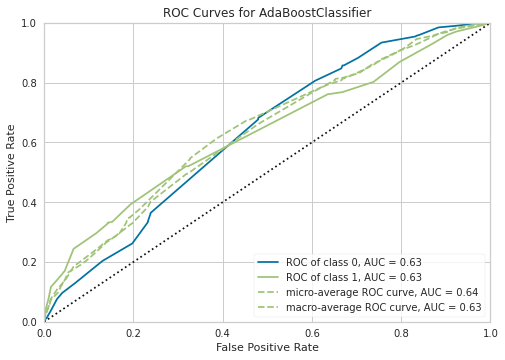

In [14]:
plot_model(model)

In [15]:
predictions = predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.6133,0.6302,0.3924,0.6398,0.4865,0.2040,0.2197
